# Detalhamento das regiões produtoras de gás natural onshore e offshore

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dados = pd.read_csv('Anuário Estatístico 2019 - Evolução da produção de gás natural, por localização.csv', sep = ';', decimal = ',')

In [3]:
nordeste, norte, sudeste = ([] for i in range(3))

for index, column in dados.iterrows():
    if column['UF'] == 'Alagoas' or column['UF'] == 'Bahia' or column['UF'] == 'Ceará' or column['UF'] == 'Maranhão' or column['UF'] == 'Rio Grande do Norte' or column['UF'] == 'Sergipe':
        nordeste.append(column)
    elif column['UF'] == 'Espírito Santo' or column['UF'] == 'Rio de Janeiro' or column['UF'] == 'São Paulo':
        sudeste.append(column)
    else:
        norte.append(column)

In [4]:
def novo_dataframe(n):
    n = pd.DataFrame(list(n))
    n.columns = ['UF', 'Localização', 'Ano', 'Produção de gás natural (milhões m3)']
    n['Produção de gás natural (milhões m3)'] = n['Produção de gás natural (milhões m3)'].mul(1000000)
    n = n.rename(columns = {'Produção de gás natural (milhões m3)' : 'Produção de gás natural (m³)'})
    n = n.groupby(['Ano'])['Produção de gás natural (m³)'].sum().to_frame().reset_index()
    return n

In [5]:
nordeste = novo_dataframe(nordeste)
norte = novo_dataframe(norte)
sudeste = novo_dataframe(sudeste)

In [6]:
def histograma(x):
    plt.figure(figsize = (10, 5))
    plt.xticks(x['Ano'])
    if x is nordeste:
       sns.barplot(x = 'Ano', y = 'Produção de gás natural (m³)', color = 'orange', data = nordeste)
       plt.title('Produção de gás natural total na região nordeste', fontsize = 16, fontweight = 'bold')
    elif x is norte:
       sns.barplot(x = 'Ano', y = 'Produção de gás natural (m³)', color = 'green', data = norte) 
       plt.title('Produção de gás natural total na região norte', fontsize = 16, fontweight = 'bold')
    elif x is sudeste:
       sns.barplot(x = 'Ano', y = 'Produção de gás natural (m³)', color = 'yellow', data = sudeste)
       plt.title('Produção de gás natural total na região sudeste', fontsize = 16, fontweight = 'bold')
    plt.show()

## Região Nordeste

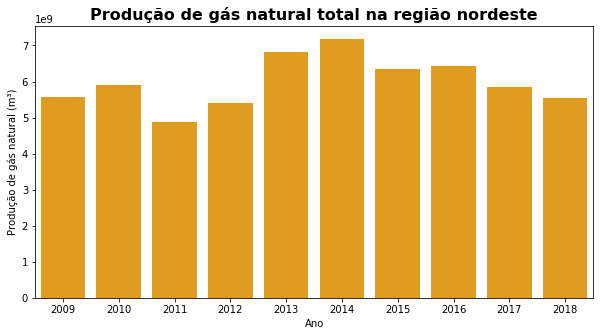

In [7]:
histograma(nordeste)

## Região Norte

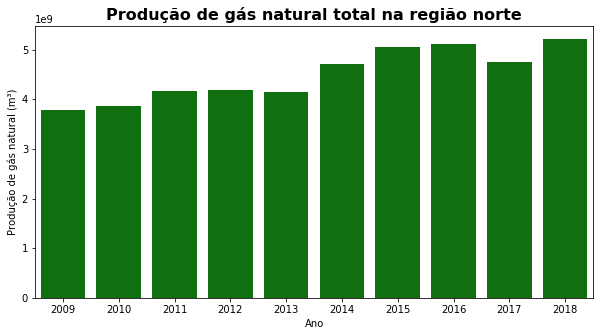

In [8]:
histograma(norte)

## Região Sudeste

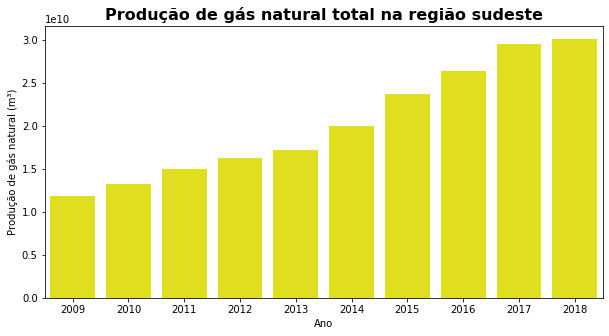

In [9]:
histograma(sudeste)